# Training Basics Workshop
![training](assets/training-basics/puppy-training.jpg)

(image: amazon)

# Setup

Create a new environment called `mldds02`. You may also reuse `mldds01`, but it's good to keep separate environments for different experiments.

From an Anaconda prompt:

```
conda create -n mldds02 python=3
conda activate mldds02

(mldds02) conda install jupyter numpy pandas matplotlib scikit-learn
(mldds02) conda install -c conda-forge ffmpeg
(mldds02) cd /path/to/mldds-courseware
(mldds02) jupyter notebook

```

# Topics

General concepts in training models
- Loss functions
- Gradient descent
- Overfitting, underfitting
- Regularization
- Cross-validation

Objective: a model that trains fast and performs well

Not an exhaustive list. We'll encounter more as we go over the different algorithms.

# Loss Functions

What they are: a metric of how far away the predictions are from the truth

For example:

![MSE](http://scikit-learn.org/stable/_images/math/44f36557fef9b30b077b21550490a1b9a0ade154.png)

a.k.a.:
- Objective function
- Cost function
- Error function

### Definitions

$$x^* = \arg \min L(x)$$

where $x^*$ = value that minimizes the loss function $L(x)$

The process of finding $x^*$ is called "Optimization". It usually involves running some type of Gradient Descent. 

### Loss Function Examples

Scikit-learn:
- [Mean squared error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): `sklearn.metrics.mean_squared_error(y_true, y_pred)`
- [Log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss): `sklearn.metrics.log_loss(y_true, y_pred)`
- [Zero one loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss)
`sklearn.metrics.zero_one_loss(y_true, y_pred)`
- etc

Keras:
- https://keras.io/losses/
- `keras.losses.mean_squared_error(y_true, y_pred)`
- `keras.losses.binary_crossentropy(y_true, y_pred)`
- etc

In [ ]:
# Plotting Log Loss
# Equation from: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss

import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 50) # avoid 0 and 1 because of div by zero
y_1 = np.ones(p.shape)
y_0 = np.zeros(p.shape)

# sklearn.metrics.log_loss returns a number, because
# it's a metric across test samples.
# So we implement our log_loss equation here: 
def log_loss(y, p):
    return -(y * np.log(p) + (1 - y) * np.log(1 - p))

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(p, log_loss(y_1, p), label='log loss for y=1')
ax.plot(p, log_loss(y_0, p), label='log loss y=0')
ax.legend()

# Gradient Descent

What it is: technique for minimizing loss function for a given model

Objective: find $w^*$ such that $$w^* = \underset{w}\arg \min{L\big(y_{true}, y_{pred}\big)}$$

$$w^* = \underset{w}\arg \min{L\big(y_{true}, f(x, w)\big)}$$


where
- $L(...)$ is the loss function
- $w$ are the weights
- $f(x, w)$ is the model that computes $y_{pred}$

### Gradient descent algorithm

1. Initialize $w$ to some value (e.g. random)
2. Compute gradient of $L\big(y_{true}, f(x, w)\big)$
3. Update $w$ by a "tiny factor" in the negative of the gradient
4. Repeat 2-3 until we reach the "stopping criteria" (more on this later)

The "tiny factor" is known as the "learning rate"

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('kJgx2RcJKZY')

## Learning Rate and Convergence

![learning rate](assets/training-basics/learningrates.jpg)

(image: https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/model_optimization.html)

### Workshop: Gradient descent. Animated

In [ ]:
# Credits: https://jed-ai.github.io/py1_gd_animation/

import numpy as np
import matplotlib.pyplot as plt

"""Example gradient descent implementation"""

def func_y(x):
    """A demonstrative loss function that happens to be convex (has global a minimum)
    Args:
        x - the input (can be the weights of a machine learning algorithm)
    Returns:
        The loss value
    """
    return x**2 - 4*x + 2

def gradient_func_y(x):
    """The gradient of func_y
    Args:
        x - the input
    Returns:
        The gradient value
    """
    return 2*x - 4 # d(x^2 - 4x + 2)/dx = 2x - 4

def gradient_descent(previous_x, learning_rate, epochs):
    """An implementation of gradient descent
    Args:
        previous_x - the previous input value
        learning_rate - how much to change x per iteration
        epochs - number of steps to run gradient descent
    Returns:
        A tuple: array of x values, array of loss values
    """
    x_gd = []
    y_gd = []
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))
    
    # loop to update x and y
    for i in range(epochs):
        # x = lr * gradient(func(prev_x))
        update = learning_rate *gradient_func_y(previous_x)
        x = previous_x - update
        print('step', i, 'previous x', previous_x,
              'update:', -update, 'new x:', x)
        x_gd.append(x)
        y_gd.append(func_y(x))
        
        # update previous_x
        previous_x = x
    
    return x_gd, y_gd

With gradient descent implemented, we'll will now run it.

In [ ]:
x0 = 0.7
learning_rate = 0.15
epochs = 10

x = np.arange(-1, 5, 0.01)
y = func_y(x)
x_gd, y_gd = gradient_descent(x0, learning_rate, epochs)

Plot the animation.

In [ ]:
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y)-1, max(y)+1])
ax.plot(x, y, lw = 0.9, color = 'k')

line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax.plot([], [], 'bo', animated=True)
value_display = ax.text(0.02, 0.02, '', transform=ax.transAxes)

def init():
    """Initializes the animation"""
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    """Animates the plot at step i
    Args:
        i: the step to animate
        return: a tuple of line, point, and value_display
    """
    # Animate line
    line.set_data(x_gd[:i], y_gd[:i])
    
    # Animate points
    point.set_data(x_gd[i], y_gd[i])

    # Animate value display
    value_display.set_text('Min = ' + str(y_gd[i]))

    return line, point, value_display

# call the animator
rc('animation', html='html5')
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(x_gd), interval=360,
                     repeat_delay=60, blit=True)

# display the video
HTML(anim.to_html5_video())

### Exercises

1. Try initializing x0 to something > 2, what do you observe?
2. Try increasing the learning_rate to something large like 10. Does the gradient still converge?
3. Replace func_y and gradient_func_y above with a cubic function. What do you observe?
  ```
  y = x^3 - 5x^2 + x + 1
  gradient(y) = 3x^2 - 10x + 1
  ```
4. Replace func_y and gradient_func_y with `cos(x)` and its derivative `-sin(x)`. What do you observe?  What needs to reach convergence?
  ```
  y = np.tan(x)
  gradient(y) = -np.sin(x)
  ```
  
Derivative formulas: https://www.derivative-calculator.net/

### Gradient Descent Variants

1. Stochastic Gradient Descent (SGD)
2. Minibatch SGD
3. Minibatch SGD with Momentum
4. Adaptive Learning Rates

### Stochastic Gradient Descent

"Regular" Gradient Descent is expensive because it processes all samples at once
- Imagine you have millions of training samples

Stochastic Gradient Descent speeds this up by:
- Running gradient descent, one randomly selected training sample at a time
- Stochastic: random noise, because samples can vary a lot

### Notation

$\leftarrow$ = replace value
Some texts use this symbol $:=$

Examples
- $\theta \leftarrow \theta - \epsilon g$
- $\theta := \theta - \epsilon g$

Means
1. Compute $\theta' = \theta - \epsilon g$
2. Update $\theta = \theta'$

![sgd](assets/training-basics/sgd.png)

Symbols:
- The $\eta_t$ denotes the learning rate
- Note: $\Theta$ is denotes the weights matrix

(image: Neural Networks in Natural Language Processing, Goldberg, 2017)

### Minibatch Stochastic Gradient Descent

Instead of 1 random sample at a time:
- Sample a "minibatch" of m training samples
- Run gradient descent on that minibatch
- "Smooths" out the randomness by operating on a minibatch.
- The minibatch size can be tuned ("hyperparameter")

![minibatch sgd](assets/training-basics/minibatch-sgd.png)

Symbols:
- $\epsilon_k$ denotes the learning rate
- $\theta$ denotes the weights matrix
- $\nabla_{\theta}$ means gradient w.r.t. $\theta$

(image: Deep Learning, Goodfellow, 2016)

### Minibatch SGD, with momentum

Speeds up minibatch SGD by:
- Applying an exponentially decaying moving average of the previous gradients ($v$)
  - if gradients point the same way, will reach minimum faster
- Minibatch SGD: $\theta \leftarrow \theta - \epsilon g$
- Minibatch SGD + momentum: $\theta \leftarrow \theta - \epsilon g + \alpha v$, $v \leftarrow v - \epsilon g$

Variant: Nesterov's momentum

Some intuition:

https://www.coursera.org/lecture/deep-neural-network/gradient-descent-with-momentum-y0m1f

Time position: 1:45

![minibatch sgd with momentum](assets/training-basics/minibatch-sgd-momentum.png)

(image: Deep Learning, Goodfellow, 2016)

### Adaptive Learning Rate Strategies

- Learning rate will control the amount of gradient update
  - Large learning rate: risk overshoot and not converge
  - Small learning rate: too slow
  - Ideal: start large(r), then reduce as we get closer to minima
- Strategies
  - Constant learning rate
  - Time-based or step-based decay
  - AdaGrad
  - RMSProp
  - Adam
- What works best depends on your domain (true for **any** optimization)

![Comparison](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png)

(image: [machine learning mastery](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning)

![Another comparison](http://scikit-learn.org/stable/_images/sphx_glr_plot_mlp_training_curves_001.png)

(image: [scikit-learn](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html))

## Speed of Convergence

![optimizers](assets/training-basics/OtherOptimizers.gif)

(image: https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/model_optimization.html)

# Underfiting, Overfitting

## Goals of training
1. Minimize training error
2. Minimize gap between test error and training error. (the "generalization gap")

(Reference: Deep Learning - Goodfellow, Bengio, Courville, MIT press, 2016)

## Generalization

How well will the model handle data not found during training?

## Underfitting, Overfitting

1. A model is set to "underfit" if the training error is too large
2. A model is set to "overfit" if the gap between test and training error is too large

A good-fit model: neither underfit nor overfit (Goldilocks and the Three Bears)

## Underfitting / High Bias

A model is set to "underfit" if the training error is too large
  - Means model does not work
  - It learnt nothing
  - Mode has "high bias"

## Overfitting / High Variance

A model is set to "overfit" if the gap between test and training error is too large
  - Means model does not generalize well
  - It only learnt the training set (or learnt too much training set noise)
  - Model has "high variance"

![underfitting overfitting](assets/training-basics/underfitting_overfitting.png)

- Degree 1: Underfit / High Bias
- Degree 4: Good fit
- Degree 15: Overfit / High Variance

(image: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

![comics](https://imgs.xkcd.com/comics/linear_regression.png)

(image: xkcd)

## Fixing Underfitting

Symptom: poor model performance even on training data

Potential cures:
- More data
- More features and/or different features
- Different algorithms

## Fixing Overfitting

Symptom: model has good performance in training data, but poor generalization on test data

Potential cures:
- Early stoppping
- Fewer features
- Regularization
- Cross Validation

## Workshop: SGD, Overfitting, Underfitting

In this workshop, we will try to fit a more complex linear regression model.

We'll explore the following concepts:
- Loss functions
- Stochastic Gradient Descent
- Underfitting and Overfitting

Inspiration:
https://sdsawtelle.github.io/blog/output/week6-andrew-ng-machine-learning-with-python.html

### Prediction Tasks

We'll try to fit a curve to predict, for recent Singapore University Graduates:
```
y: Gross Monthly Median Salary (S$)
x: Overall Employment Rate (%)
```

To illustrate underfitting/overfitting, we'll explore:
- A first-order linear model: $y = w^Tx$
- A linear model with polynomial features
$$y = w^TX$$
where $X = [1, x, x^2, x^3, ...]$

We'll also explore different loss functions and plotting of loss curves during training.

### Dataset(s)

1. Download this dataset: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-sutd
2. Unzip it and note the path for use in `pandas.read_csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Data Transformation and Cleaning

The first step is to inspect the data to see what transformation/cleaning is needed.

In [2]:
# ISO-8859-1 encoding is needed
#   UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 20: invalid continuation byte

df = pd.read_csv('D:/tmp/graduate-employment-survey-ntu-nus-sit-smu-sutd/graduate-employment-survey-ntu-nus-sit-smu-sutd.csv',
                 encoding='ISO-8859-1',
                 usecols=['university', 'employment_rate_overall', 'gross_monthly_median'])

# filter by NUS to keep things simple
df = df.loc[df.university == 'National University of Singapore']

df.columns

Index(['university', 'employment_rate_overall', 'gross_monthly_median'], dtype='object')

The columns to inspect are:
- employment_rate_overall
- gross_monthly_median

We are looking for:
- invalid values
- data types to transform to numeric
- feature ranges

In [3]:
# the sample size is fairly small, we can inspect using .unique()
print(df.describe())
print('')
print(df.employment_rate_overall.unique())

                              university employment_rate_overall  \
count                                118                     118   
unique                                 1                      74   
top     National University of Singapore                      na   
freq                                 118                      15   

       gross_monthly_median  
count                   118  
unique                   47  
top                    3000  
freq                     16  

['84.8' '86.6' '88.1' '88.7' '94.6' '93.3' '97.2' '88.9' 'na' '92.4'
 '89.2' '100' '82.1' '96.8' '74' '93.2' '96.1' '88.5' '86.2' '93.8' '93.9'
 '90.9' '89.1' '98.8' '97.5' '97.3' '80.9' '83.6' '96.4' '81.9' '83.1'
 '87.9' '94.4' '90.6' '85.7' '95.5' '98.4' '77.3' '95.3' '93.1' '87.5'
 '83.9' '97.1' '95.2' '81.3' '96.5' '78.6' '90' '98.2' '76.8' '98.9'
 '88.4' '83' '88.6' '88.2' '96' '97.6' '98.6' '92.6' '97' '90.3' '72'
 '94.3' '86' '91.8' '92.1' '82.6' '83.3' '96.9' '82.4' '85.2' '84.3' '99'
 '71.9']


`employment_rate_overall` column
- invalid values: yes, there is an 'na' value above
- data type is object (these are string values)
  - need to transform to numbers
  - How: use [pandas.to_numeric](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html) to convert to numbers
- range: 0-100

If the dataset is large, it is hard to find the 'na' values.

A quick test is to try converting the column first, to see if errors appear.

In [4]:
pd.to_numeric(df.employment_rate_overall) # see if we get parse errors

ValueError: Unable to parse string "na" at position 8

We will be using the `errors='coerce'` option in [pandas.to_numeric](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html) when we do the actual conversion.

In [5]:
pd.to_numeric(df.employment_rate_overall, errors='coerce') # 'na' becomes NaN

34      84.8
35      86.6
36      88.1
37      88.7
38      94.6
39      93.3
40      97.2
41      88.9
42       NaN
43       NaN
44      92.4
45      88.9
46      89.2
47     100.0
48       NaN
49      82.1
50      96.8
51      89.2
52      74.0
53      93.2
54      96.1
55      88.9
56      88.5
57      86.2
58      93.8
59      93.9
60      90.9
61      89.1
62      98.8
63     100.0
       ...  
243     97.0
244     90.3
245     97.2
246    100.0
247     97.6
248     72.0
249     94.3
250     93.9
251     86.2
252     86.0
253     96.5
254     91.8
255     92.1
256     82.6
257     88.1
258     96.1
259    100.0
260     83.3
261     96.9
262    100.0
263     97.3
264    100.0
265     82.4
266      NaN
267     85.2
268     84.3
269     83.9
270      NaN
271     99.0
272     71.9
Name: employment_rate_overall, Length: 118, dtype: float64

The `gross_monthly_median` column is handled the same way.

Let's now perform the data transformation and cleaning.

In [6]:
# transform string to numbers, forcing invalid values to float NaN
data = {
    'gross_monthly_median': pd.to_numeric(df.gross_monthly_median, errors='coerce'),
    'employment_rate_overall': pd.to_numeric(df.employment_rate_overall, errors='coerce')
}

# drop NaNs
df_dataset = pd.DataFrame(data).dropna()

df_dataset.head()

,gross_monthly_median,employment_rate_overall
34,2800.0,84.8
35,3200.0,86.6
36,3200.0,88.1
37,3000.0,88.7
38,3200.0,94.6


### Visualize Dataset
Let's plot the dataset to visualize our data.

We'll use a scatter plot.

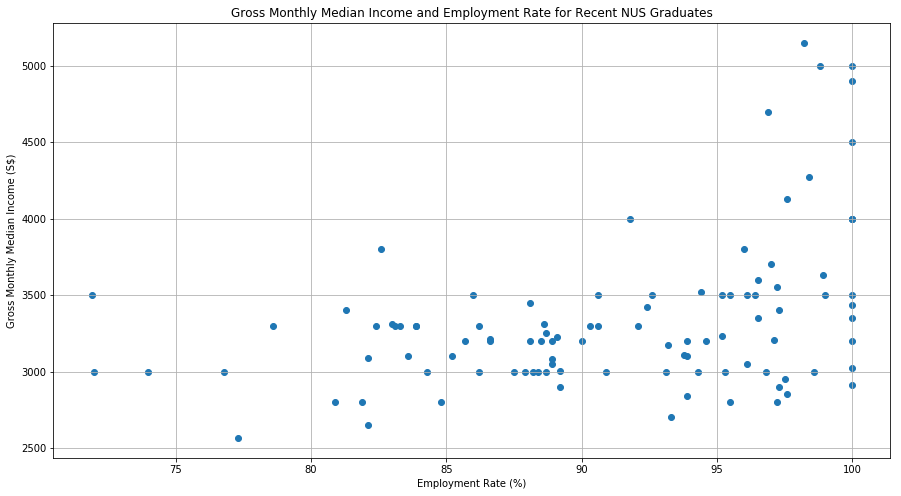

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.scatter(df_dataset.employment_rate_overall, df_dataset.gross_monthly_median)

ax.set(title='Gross Monthly Median Income and Employment Rate for Recent NUS Graduates',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')
ax.grid()

Inspecting the plot above, we can roughly make out a curve through it.

### 2. Feature selection
    
#### Inputs

|Feature|Description|Column name|Transformation before model input?|
|--|--|--|
|$x_1$|Overall Employment Rate (%)|employment_rate_overall|pd.to_numeric|

#### Outputs

|Output|Description|Truth column|Transformation from model output?|
|--|--|--|
|$\hat{y}$|Predicted Gross Monthly Medium Income S\$|$y$ = gross_monthly_median|None, output will stay numeric|

In [8]:
# Prepare the numpy arrays for use with sklearn
X = df_dataset.loc[:, 'employment_rate_overall']
print('X.shape:', X.shape)

y = df_dataset.loc[:, 'gross_monthly_median']
print('y.shape:', y.shape)

X.shape: (103,)
y.shape: (103,)


### 3. Model creation and training, and validation

In this section, we will
1. Shuffle and then split dataset into train and test
2. Perform feature scaling
3. Train and validate our models

### Dataset shuffling and train-test-split

In a previous workshop, we did the randomization and train-test split manually. 

Turns out, [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this for us.

In [9]:
from sklearn.model_selection import train_test_split

# train-test split, witholding 15% for test data
# shuffle=True is the default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train.head() # view the shuffled dataset

45      88.9
251     86.2
154     76.8
264    100.0
40      97.2
Name: employment_rate_overall, dtype: float64

### Feature scaling

Since we are using Stochastic Gradient Descent, we are recommended to scale the features between [0, 1] or [-1, 1].
- See [Tips on Practical Use for SGDRegressor](http://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use).

- Scaling subtracts the mean and divides by the standard deviation
- We will scale both the input and output values, using [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
- In both cases (input and output), the mean and standard deviation will be based on the training set only. This way we don't look at the test set. 

In [10]:
from sklearn.preprocessing import StandardScaler

# We train the scaler based on the training set, and use
# it for both the training and test sets
#
# Reason: the test set shouldn't pollute the dataset
x_scaler = StandardScaler()
x_scaler.fit(X_train.values.reshape(-1, 1)) # must be 2D array
X_train_scaled = x_scaler.transform(X_train.values.reshape(-1, 1))
X_test_scaled = x_scaler.transform(X_test.values.reshape(-1, 1))

y_scaler = StandardScaler()
y_scaler.fit(y_train.values.reshape(-1, 1))
y_train_scaled = y_scaler.transform(y_train.values.reshape(-1, 1))[:, 0]
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))[:, 0]

In [11]:
X_train.head() # before scaling

45      88.9
251     86.2
154     76.8
264    100.0
40      97.2
Name: employment_rate_overall, dtype: float64

In [12]:
X_train_scaled[:5] # after scaling (showing first 5 values)

array([[-0.36180502],
       [-0.75911875],
       [-2.14235916],
       [ 1.27159589],
       [ 0.85956683]])

In [13]:
y_train.head() # before scaling

45     3080.0
251    3300.0
154    3000.0
264    3435.0
40     2800.0
Name: gross_monthly_median, dtype: float64

In [14]:
y_train_scaled[:5] # after scaling (showing first 5 values)

array([-0.49990712, -0.06830195, -0.65685446,  0.19654669, -1.04922281])

### Underfit Model: First Order Linear Regressor

For the first order linear regressor, we'll use `sklearn.linear_model.SGDRegressor` with the dataset above.

In [15]:
from sklearn.linear_model import SGDRegressor

# SGDRegressor?

In [16]:
linear_model = SGDRegressor(verbose=1,
                            random_state=np.random.RandomState(123),
                            loss='squared_loss', # mean squared loss
                            penalty='none', # no regularization
                            max_iter=100,
                            tol=1e-3, # stopping condition
                            eta0=0.01, # learning rate
                            learning_rate='constant') # learning rate schedule
%time linear_model.fit(X_train_scaled, y_train_scaled)

print('Coefficient', linear_model.coef_)
print('Intercept', linear_model.intercept_)

-- Epoch 1
Norm: 0.26, NNZs: 1, Bias: 0.008290, T: 92, Avg. loss: 0.459627
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 1, Bias: -0.013057, T: 184, Avg. loss: 0.425798
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.40, NNZs: 1, Bias: 0.006200, T: 276, Avg. loss: 0.420563
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 1, Bias: 0.003078, T: 368, Avg. loss: 0.420259
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
Wall time: 2.01 ms
Coefficient [0.42137592]
Intercept [0.003078]


#### Model Validation

Let's validate our model's performance by computing metrics and plotting the linear model.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

pred_scaled = linear_model.predict(X_test_scaled)
print('Truth:', y_test_scaled)
print('Predictions:', pred_scaled)

# Compute metrics
print('MSE:', mean_squared_error(y_test_scaled, pred_scaled))
print('R2:', r2_score(y_test_scaled, pred_scaled))

Truth: [-0.16639403 -0.26448612  0.3240664  -0.55876238  2.28590812 -0.26448612
 -0.06830195  0.22597431 -0.26448612  0.3240664  -1.04922281]
Predictions: [-0.16177929 -0.19898339  0.3156733   0.29707126  0.53889789  0.20406101
 -0.45941207 -0.19898339  0.16065623 -1.20349403 -0.58342573]
MSE: 0.6430113345925406
R2: 0.006140216306709245


#### Model Visualization

We'll visualize the entire dataset (train + test), by plotting the data as a sactter plot, and the linear function as a curve or line.

The model needs to be called with pre- and post-processing stages:
1. Scale the input
2. Call `predict`
3. Unscale the output

In both steps, we'll use the already-fitted scalers from previously. This ensures that the pre- and post-processing matches exactly with how the model was trained.

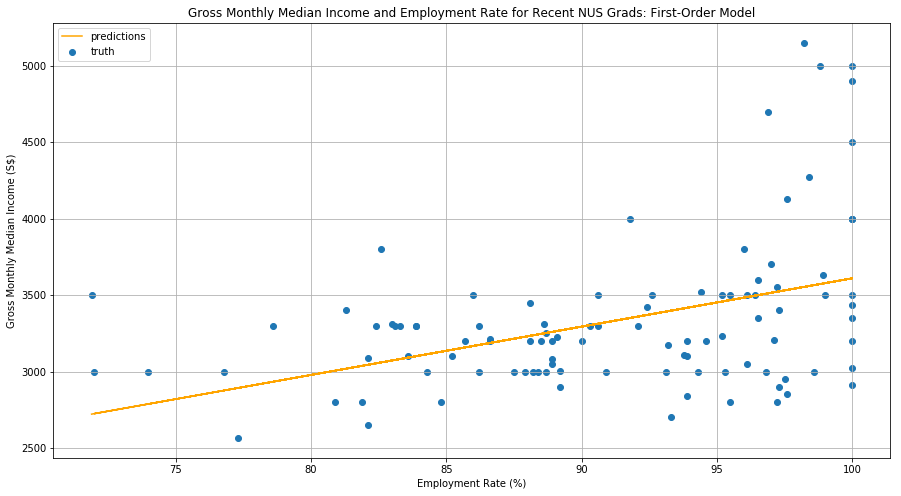

In [18]:
# First, call the model in 3 stages
# 1. Pre-process the input
X_scaled = x_scaler.transform(X.values.reshape(-1, 1))

# 2. Predict
y_pred_scaled = linear_model.predict(X_scaled)

# 3. Post-process the output
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Finally, plot dataset and predictions
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(X.values, y, label='truth')
ax.plot(X.values, y_pred, label='predictions', color='orange')

ax.set(title='Gross Monthly Median Income and Employment Rate for Recent NUS Grads: First-Order Model',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')

ax.grid()
ax.legend()

### Polynomial Regression

A linear model is obviously underfit, because it tries to draw a straight line. Let's try a curve instead (polynomial model).

To generate polynomial features from x (Employment Rate), we use [sklearn.preprocessing.PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(12)
poly.fit(X_train.values.reshape(-1, 1))

X_train_poly = poly.transform(X_train.values.reshape(-1, 1))
X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

# Scale the features back to SGD happy ranges ([-1, 1])
x_scaler_poly = StandardScaler()
x_scaler_poly.fit(X_train_poly)
X_train_poly_scaled = x_scaler_poly.transform(X_train_poly)
X_test_poly_scaled = x_scaler_poly.transform(X_test_poly)

In [27]:
poly_model = SGDRegressor(verbose=1,
                          random_state=np.random.RandomState(123),
                          loss='squared_loss', # mean squared loss
                          penalty='none', # no regularization
                          max_iter=100,
                          tol=1e-4, # stopping condition
                          eta0=0.01, # learning rate
                          learning_rate='constant') # learning rate schedule
%time poly_model.fit(X_train_poly_scaled, y_train_scaled)

print('Coefficients', poly_model.coef_)
print('Intercept', poly_model.intercept_)

-- Epoch 1
Norm: 0.14, NNZs: 12, Bias: 0.018269, T: 92, Avg. loss: 0.444856
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 12, Bias: -0.000779, T: 184, Avg. loss: 0.422229
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.14, NNZs: 12, Bias: -0.019842, T: 276, Avg. loss: 0.406931
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.29, NNZs: 12, Bias: -0.004335, T: 368, Avg. loss: 0.430802
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
Wall time: 1 ms
Coefficients [0.         0.0070976  0.01706071 0.02787894 0.03939072 0.05143912
 0.06387606 0.07656504 0.08938269 0.10221944 0.11497948 0.12758029
 0.13995191]
Intercept [-0.00433545]


### Exercise: Model Validation and Visualization

Follow the pattern above to validate and visualize the new model.

This means two tasks:
1. Computing metrics
2. Plotting the curve (hint: use a scatter plot for both)

In [28]:
# Compute metrics
# Your code here

from sklearn.metrics import mean_squared_error, r2_score

pred_scaled = poly_model.predict(X_test_poly_scaled)
print('Truth:', y_test_scaled)
print('Predictions:', pred_scaled)

# Compute metrics
print('MSE:', mean_squared_error(y_test_scaled, pred_scaled))
print('R2:', r2_score(y_test_scaled, pred_scaled))

Truth: [-0.16639403 -0.26448612  0.3240664  -0.55876238  2.28590812 -0.26448612
 -0.06830195  0.22597431 -0.26448612  0.3240664  -1.04922281]
Predictions: [-0.53963123 -0.60007174  0.56737358  0.50994656  1.37828951  0.24302713
 -0.94981418 -0.60007174  0.12924311 -1.49151837 -1.07898216]
MSE: 0.6769340393782998
R2: -0.04629184861486779


In [43]:
pd.DataFrame?

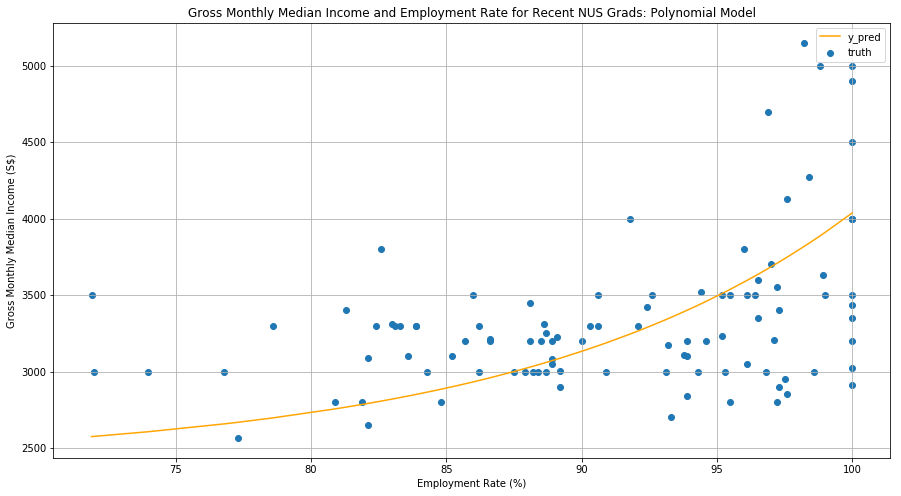

In [59]:
# Plot curve

# First, call the model in 3 stages
# 1. Pre-process the input
# Hint: you need to create the polynomial, then scale
#
# Your code here

X_poly = poly.transform(X.values.reshape(-1, 1))

X_poly_scaled = x_scaler_poly.transform(X_poly)


# 2. Predict
#
# Your code here

y_pred_scaled = poly_model.predict(X_poly_scaled)


# 3. Post-process the output by un-scaling y
#
# Your code here

y_pred = y_scaler.inverse_transform(y_pred_scaled)


# Finally, plot dataset and predictions
#
# Your code here

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(X.values, y, label='truth')

df_plot = pd.DataFrame({'y_pred': y_pred}, index=X.values)
df_plot.sort_index(inplace=True)
df_plot.plot(ax=ax, label='predictions', color='orange')

ax.set(title='Gross Monthly Median Income and Employment Rate for Recent NUS Grads: Polynomial Model',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')

ax.grid()
ax.legend()

In [41]:
series = np.stack((X.values, y_pred), axis=1)
series = np.sort(series, axis=0)
series[:, 0]

array([2574.55084192, 2575.95496755, 2606.36286067, 2657.50089019,
       2667.85234374, 2696.73343697, 2755.65915006, 2767.04951311,
       2784.83090905, 2790.94997696, 2790.94997696, 2800.3141709 ,
       2806.68315816, 2819.73176794, 2823.05992239, 2829.7970062 ,
       2840.10800913, 2850.67107164, 2850.67107164, 2865.15842288,
       2883.93794826, 2899.51774379, 2919.71550895, 2932.23293645,
       2940.74874199, 2940.74874199, 2958.20084789, 2958.20084789,
       2999.60603415, 3019.00462246, 3028.94357752, 3028.94357752,
       3033.97414473, 3044.15916683, 3049.31431333, 3054.51168251,
       3059.75162717, 3059.75162717, 3070.36066833, 3070.36066833,
       3070.36066833, 3081.14431629, 3086.60253033, 3086.60253033,
       3131.91105487, 3149.68013286, 3167.89045212, 3167.89045212,
       3186.55309517, 3245.36982179, 3265.9579998 , 3287.05802811,
       3301.41536923, 3338.35426457, 3345.92523764, 3353.55845026,
       3392.67614659, 3400.69367714, 3400.69367714, 3400.69367

### Learning Curves for Underfit/Overfit Detection

Even with the above polynomial curve, it's hard to tell if we are truly overfitting.

The standard practice to determine model fit is to plot learning curves of the training scores and test scores during training iterations.

Let's compare the learning curves for both the linear and polynomial case.

Reference: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [60]:
from sklearn.model_selection import learning_curve

# learning_curve?

In [61]:
def plot_learning_curve(axis, title, tr_sizes, tr_scores, val_scores):
    """Plots the learning curve for a training session
    Arg:
        axis: axis to plot
        title: plot title
        tr_sizes: sizes of the training set
        tr_scores: training scores
        val_scores: validation scores
    """
    tr_scores_mean = np.mean(tr_scores, axis=1)
    tr_scores_std = np.std(tr_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    axis.fill_between(tr_sizes, tr_scores_mean - tr_scores_std,
                    tr_scores_mean + tr_scores_std, alpha=0.1,
                    color="r")
    axis.fill_between(tr_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")
    axis.plot(tr_sizes, tr_scores_mean, 'o-', color="r",
            label="Training score")
    axis.plot(tr_sizes, val_scores_mean, 'o-', color="g",
            label="Cross-validation score")
    axis.set(title=title,
           xlabel='Training examples',
           ylabel='R2 Scores')
    axis.grid()
    axis.legend()

In [62]:
# Generate the learning curve for linear_model
# By default this uses 3-fold Cross Validation (more on that later)
train_sizes, train_scores, validation_scores = learning_curve(
    linear_model, X_train_scaled, y_train_scaled,
    random_state=np.random.RandomState(123))

-- Epoch 1
Norm: 0.01, NNZs: 1, Bias: -0.040517, T: 6, Avg. loss: 0.286001
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1, Bias: -0.078879, T: 12, Avg. loss: 0.259042
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 1, Bias: -0.114911, T: 18, Avg. loss: 0.235068
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 1, Bias: -0.148589, T: 24, Avg. loss: 0.213914
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 1, Bias: -0.180312, T: 30, Avg. loss: 0.195200
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 1, Bias: -0.210393, T: 36, Avg. loss: 0.178513
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 1, Bias: -0.238635, T: 42, Avg. loss: 0.163658
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.05, NNZs: 1, Bias: -0.264982, T: 48, Avg. loss: 0.150560
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.06, NNZs: 1, Bias: -0.289808, T: 54, Avg. loss: 0.138975
Total training time: 0.00 seconds.
--

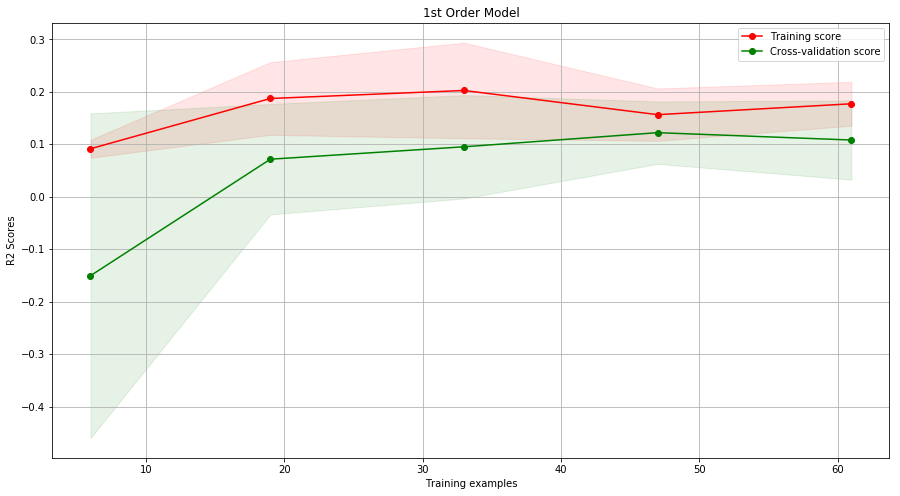

In [63]:
# Plot the learning curve, along with the stats
fig, ax = plt.subplots(figsize=(15, 8))

plot_learning_curve(ax, '1st Order Model',
                    train_sizes, train_scores, validation_scores)

## Exercise: Plot Learning Curve

Follow the example above and:
1. Generate the learning curve for the polynomial model (`poly_model`)
2. Plot the learning curve and the statistics

In [64]:
# 1. Generate the learning curve for poly_model
#
# Your code here

# Generate the learning curve for linear_model
# By default this uses 3-fold Cross Validation (more on that later)
train_sizes, train_scores, validation_scores = learning_curve(
    poly_model, X_train_poly_scaled, y_train_scaled,
    random_state=np.random.RandomState(123))


-- Epoch 1
Norm: 0.01, NNZs: 12, Bias: -0.041140, T: 6, Avg. loss: 0.296154
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 12, Bias: -0.079675, T: 12, Avg. loss: 0.265518
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 12, Bias: -0.116240, T: 18, Avg. loss: 0.238835
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 12, Bias: -0.150273, T: 24, Avg. loss: 0.215261
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 12, Bias: -0.182277, T: 30, Avg. loss: 0.194650
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 12, Bias: -0.212310, T: 36, Avg. loss: 0.176452
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 12, Bias: -0.240753, T: 42, Avg. loss: 0.160500
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.08, NNZs: 12, Bias: -0.267141, T: 48, Avg. loss: 0.146397
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.09, NNZs: 12, Bias: -0.291941, T: 54, Avg. loss: 0.134075
Total training time: 0.00 se

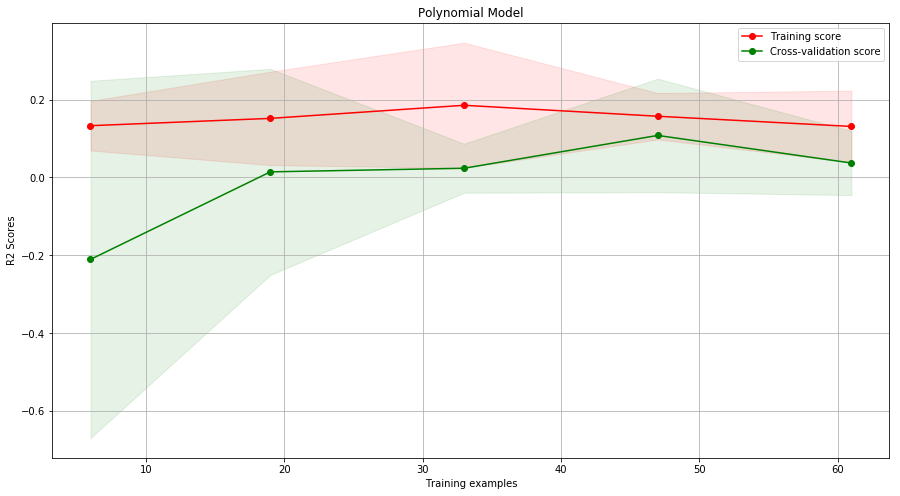

In [65]:
# 2. Plot the learning curve, along with the stats
#
# Your code here


# Plot the learning curve, along with the stats
fig, ax = plt.subplots(figsize=(15, 8))

plot_learning_curve(ax, 'Polynomial Model',
                    train_sizes, train_scores, validation_scores)



## Observations

The learning curves show:
- Both models are underfit: the training scores are very low. 
  - Why? The data is quite dispersed, and linear regression is probably not a good way to model this 
- The polynomial model generalizes slightly better
  - It has a narrower gap between training scores and validation scores

## Robust Linear Regression against Outliers

The most obvious problem with the data is the presence of lots of outliers.

There are some models that are a bit more robust against outliers. One of them is the RANdom SAmple Consensus model (RANSAC), which can be trained using a baseline estimator to split the data into two sets: inliers and outliers.

http://scikit-learn.org/stable/modules/linear_model.html#ransac-random-sample-consensus

Let's give it a try.

In [66]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(poly_model,
                         random_state=np.random.RandomState(123))

%time ransac.fit(X_train_poly_scaled, y_train_scaled)

pred_scaled = ransac.predict(X_test_poly_scaled)
print('Truth:', y_test_scaled)
print('Predictions:', pred_scaled)

# Compute metrics
print('MSE:', mean_squared_error(y_test_scaled, pred_scaled))
print('R2:', r2_score(y_test_scaled, pred_scaled))

-- Epoch 1
Norm: 0.01, NNZs: 12, Bias: -0.058599, T: 14, Avg. loss: 0.315470
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 12, Bias: -0.112864, T: 28, Avg. loss: 0.294911
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 12, Bias: -0.157945, T: 42, Avg. loss: 0.253951
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 12, Bias: -0.201906, T: 56, Avg. loss: 0.262406
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.02, NNZs: 12, Bias: -0.025346, T: 14, Avg. loss: 0.266877
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 12, Bias: -0.039602, T: 28, Avg. loss: 0.264225
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 12, Bias: -0.060241, T: 42, Avg. loss: 0.259793
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 12, Bias: -0.075506, T: 56, Avg. loss: 0.251430
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.08, NNZs: 12, Bias: -0.087653, T: 70, Av

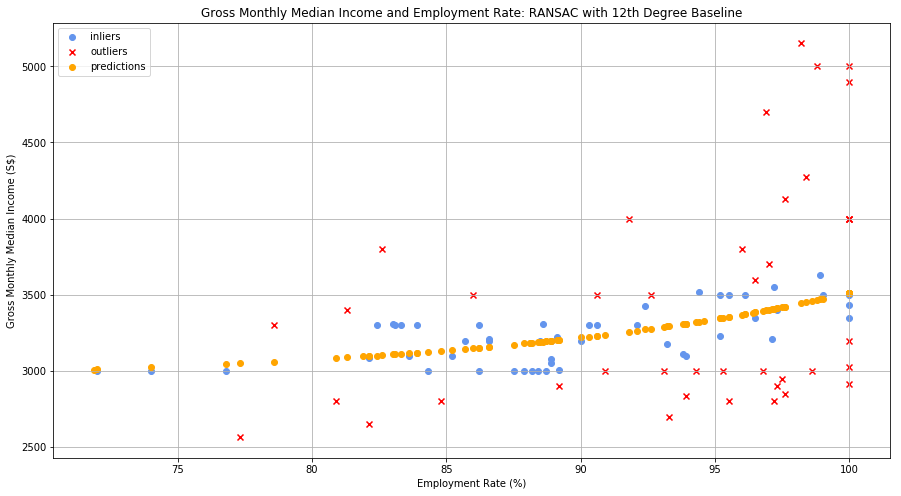

In [67]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

X_poly = poly.transform(X.values.reshape(-1, 1))
X_poly_scaled = x_scaler_poly.transform(X_poly)
y_pred_scaled = ransac.predict(X_poly_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(X_train[inlier_mask], y_train[inlier_mask],
           color='cornflowerblue', marker='o', label='inliers')
ax.scatter(X_train[outlier_mask], y_train[outlier_mask],
           color='red', marker='x', label='outliers')
ax.scatter(X.values, y_pred,
           color='orange', label='predictions')

ax.set(title='Gross Monthly Median Income and Employment Rate: RANSAC with 12th Degree Baseline',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')

ax.grid()
ax.legend()

In [68]:
train_sizes, train_scores, validation_scores = learning_curve(
    ransac, X_train_poly_scaled, y_train_scaled,
    train_sizes=[0.25, 0.5, 0.75, 1],
    random_state=np.random.RandomState(123))

-- Epoch 1
Norm: 0.05, NNZs: 12, Bias: -0.045847, T: 14, Avg. loss: 0.257601
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 12, Bias: -0.083460, T: 28, Avg. loss: 0.232281
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 12, Bias: -0.116024, T: 42, Avg. loss: 0.222620
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 12, Bias: -0.141760, T: 56, Avg. loss: 0.215777
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.08, NNZs: 12, Bias: -0.164446, T: 70, Avg. loss: 0.211842
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.10, NNZs: 12, Bias: -0.184935, T: 84, Avg. loss: 0.200020
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 12, Bias: -0.198150, T: 98, Avg. loss: 0.202725
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.04, NNZs: 12, Bias: -0.058273, T: 14, Avg. loss: 0.233145
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 12, Bias: -0.107733, T: 28, Av

-- Epoch 10
Norm: 0.10, NNZs: 12, Bias: -0.219203, T: 140, Avg. loss: 0.185546
Total training time: 0.07 seconds.
Convergence after 10 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.04, NNZs: 12, Bias: -0.045495, T: 14, Avg. loss: 0.251682
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 12, Bias: -0.085861, T: 28, Avg. loss: 0.229368
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 12, Bias: -0.117197, T: 42, Avg. loss: 0.215000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.11, NNZs: 12, Bias: -0.140099, T: 56, Avg. loss: 0.211407
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 12, Bias: -0.163641, T: 70, Avg. loss: 0.211068
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 12, Bias: -0.184996, T: 84, Avg. loss: 0.204625
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 12, Bias: -0.205529, T: 98, Avg. loss: 0.203988
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 12, Bias: -0.220683, T: 112

Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 12, Bias: -0.049862, T: 56, Avg. loss: 0.345921
Total training time: 0.04 seconds.
Convergence after 4 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.30, NNZs: 12, Bias: 0.031717, T: 14, Avg. loss: 0.673480
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 12, Bias: 0.056328, T: 28, Avg. loss: 0.515590
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.40, NNZs: 12, Bias: 0.078343, T: 42, Avg. loss: 0.507802
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.36, NNZs: 12, Bias: 0.096885, T: 56, Avg. loss: 0.537410
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.26, NNZs: 12, Bias: 0.035942, T: 14, Avg. loss: 0.733286
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 12, Bias: 0.059153, T: 28, Avg. loss: 0.455759
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.36, NNZs: 12, Bias: 0.094876, T: 42, Avg. loss: 0.500315
Total training time: 

-- Epoch 4
Norm: 0.29, NNZs: 12, Bias: 0.019455, T: 56, Avg. loss: 0.833973
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 0.23, NNZs: 12, Bias: 0.004653, T: 70, Avg. loss: 0.797619
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.25, NNZs: 12, Bias: 0.008164, T: 84, Avg. loss: 0.830237
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 0.16, NNZs: 12, Bias: 0.005871, T: 14, Avg. loss: 0.673715
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 12, Bias: 0.001641, T: 28, Avg. loss: 0.579036
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.29, NNZs: 12, Bias: 0.000089, T: 42, Avg. loss: 0.538551
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 12, Bias: -0.002694, T: 56, Avg. loss: 0.528885
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.29, NNZs: 12, Bias: -0.013715, T: 70, Avg. loss: 0.561662
Total training time: 0.00 seconds.
Convergence after 5 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.0

Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 12, Bias: 0.013632, T: 56, Avg. loss: 0.399332
Total training time: 0.04 seconds.
Convergence after 4 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.20, NNZs: 12, Bias: 0.030673, T: 14, Avg. loss: 0.508772
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 12, Bias: 0.047494, T: 28, Avg. loss: 0.325522
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 12, Bias: 0.068757, T: 42, Avg. loss: 0.309174
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 12, Bias: 0.083496, T: 56, Avg. loss: 0.326808
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.12, NNZs: 12, Bias: -0.005682, T: 14, Avg. loss: 0.689546
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.08, NNZs: 12, Bias: -0.023670, T: 28, Avg. loss: 0.614113
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.17, NNZs: 12, Bias: -0.041974, T: 42, Avg. loss: 0.651087
Total training time

-- Epoch 13
Norm: 0.08, NNZs: 12, Bias: -0.340596, T: 182, Avg. loss: 0.063468
Total training time: 0.05 seconds.
-- Epoch 14
Norm: 0.07, NNZs: 12, Bias: -0.350083, T: 196, Avg. loss: 0.063484
Total training time: 0.05 seconds.
Convergence after 14 epochs took 0.05 seconds
-- Epoch 1
Norm: 0.16, NNZs: 12, Bias: -0.009481, T: 14, Avg. loss: 0.283684
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.18, NNZs: 12, Bias: -0.017593, T: 28, Avg. loss: 0.210809
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 12, Bias: -0.025185, T: 42, Avg. loss: 0.206696
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.17, NNZs: 12, Bias: -0.030289, T: 56, Avg. loss: 0.198024
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.22, NNZs: 12, Bias: -0.046366, T: 70, Avg. loss: 0.186386
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 12, Bias: -0.054310, T: 84, Avg. loss: 0.199819
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 

-- Epoch 1
Norm: 0.06, NNZs: 12, Bias: -0.010050, T: 14, Avg. loss: 0.152205
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 12, Bias: -0.009459, T: 28, Avg. loss: 0.149765
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 12, Bias: -0.019411, T: 42, Avg. loss: 0.158865
Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.16, NNZs: 12, Bias: -0.005843, T: 14, Avg. loss: 0.475107
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 12, Bias: -0.048448, T: 28, Avg. loss: 0.492484
Total training time: 0.00 seconds.
Convergence after 2 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.09, NNZs: 12, Bias: 0.035251, T: 14, Avg. loss: 0.474355
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.08, NNZs: 12, Bias: 0.067472, T: 28, Avg. loss: 0.420847
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 12, Bias: 0.079564, T: 42, Avg. loss: 0.430530
Total training time: 0.00 seconds.
Convergence after

Total training time: 0.04 seconds.
Convergence after 2 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.10, NNZs: 12, Bias: 0.015985, T: 14, Avg. loss: 0.406705
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.19, NNZs: 12, Bias: 0.041549, T: 28, Avg. loss: 0.339104
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.16, NNZs: 12, Bias: 0.061518, T: 42, Avg. loss: 0.350771
Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.04, NNZs: 12, Bias: -0.005836, T: 14, Avg. loss: 0.478580
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 12, Bias: -0.001689, T: 28, Avg. loss: 0.467252
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 12, Bias: -0.004389, T: 42, Avg. loss: 0.466534
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.11, NNZs: 12, Bias: 0.001978, T: 56, Avg. loss: 0.459858
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.13, NNZs: 12, Bias: 0.004318, T: 70, Avg. loss: 0.453464
Total training time

Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.07, NNZs: 12, Bias: 0.018660, T: 14, Avg. loss: 0.584279
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 12, Bias: 0.058186, T: 28, Avg. loss: 0.527802
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 12, Bias: 0.088125, T: 42, Avg. loss: 0.542478
Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.12, NNZs: 12, Bias: 0.003784, T: 14, Avg. loss: 0.358261
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 12, Bias: 0.028085, T: 28, Avg. loss: 0.359022
Total training time: 0.00 seconds.
Convergence after 2 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.16, NNZs: 12, Bias: 0.004036, T: 14, Avg. loss: 0.386947
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 12, Bias: 0.017635, T: 28, Avg. loss: 0.298957
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.23, NNZs: 12, Bias: 0.027918, T: 4

Norm: 0.10, NNZs: 12, Bias: 0.043308, T: 14, Avg. loss: 0.961310
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 12, Bias: 0.059331, T: 28, Avg. loss: 0.792775
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.13, NNZs: 12, Bias: 0.067253, T: 42, Avg. loss: 0.939264
Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.05, NNZs: 12, Bias: 0.008273, T: 14, Avg. loss: 0.618077
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 12, Bias: 0.005113, T: 28, Avg. loss: 0.596759
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 12, Bias: 0.017308, T: 42, Avg. loss: 0.605407
Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.08, NNZs: 12, Bias: 0.043037, T: 14, Avg. loss: 0.932343
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 12, Bias: 0.048031, T: 28, Avg. loss: 0.878975
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.22, NNZs: 12, 

Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 12, Bias: 0.052227, T: 42, Avg. loss: 0.675790
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.18, NNZs: 12, Bias: 0.065122, T: 56, Avg. loss: 0.686060
Total training time: 0.03 seconds.
Convergence after 4 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.02, NNZs: 12, Bias: -0.012007, T: 14, Avg. loss: 0.645110
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 12, Bias: -0.019947, T: 28, Avg. loss: 0.599350
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.13, NNZs: 12, Bias: -0.026790, T: 42, Avg. loss: 0.624619
Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.02, NNZs: 12, Bias: -0.022374, T: 14, Avg. loss: 0.165936
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 12, Bias: -0.032499, T: 28, Avg. loss: 0.151309
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 12, Bias: -0.043483, T: 42, Avg. loss: 0.135149
Total training t

-- Epoch 5
Norm: 0.18, NNZs: 12, Bias: -0.105819, T: 70, Avg. loss: 0.226011
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.17, NNZs: 12, Bias: -0.118801, T: 84, Avg. loss: 0.232872
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 0.02, NNZs: 12, Bias: -0.025381, T: 14, Avg. loss: 0.112940
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 12, Bias: -0.052189, T: 28, Avg. loss: 0.099493
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 12, Bias: -0.067704, T: 42, Avg. loss: 0.099900
Total training time: 0.00 seconds.
Convergence after 3 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.09, NNZs: 12, Bias: 0.019588, T: 14, Avg. loss: 0.871389
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.17, NNZs: 12, Bias: 0.049919, T: 28, Avg. loss: 0.798244
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 12, Bias: 0.070725, T: 42, Avg. loss: 0.749485
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 

Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.15, NNZs: 12, Bias: 0.129602, T: 56, Avg. loss: 0.434973
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 0.25, NNZs: 12, Bias: 0.157735, T: 70, Avg. loss: 0.399383
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.19, NNZs: 12, Bias: 0.158513, T: 84, Avg. loss: 0.413413
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 0.14, NNZs: 12, Bias: 0.008531, T: 14, Avg. loss: 0.484148
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.15, NNZs: 12, Bias: 0.010906, T: 28, Avg. loss: 0.432992
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 12, Bias: 0.010739, T: 42, Avg. loss: 0.408593
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 12, Bias: 0.016994, T: 56, Avg. loss: 0.440098
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds
-- Epoch 1
Norm: 0.10, NNZs: 12, Bias: -0.046332, T: 14, Avg. loss: 0.187073
Total training time: 

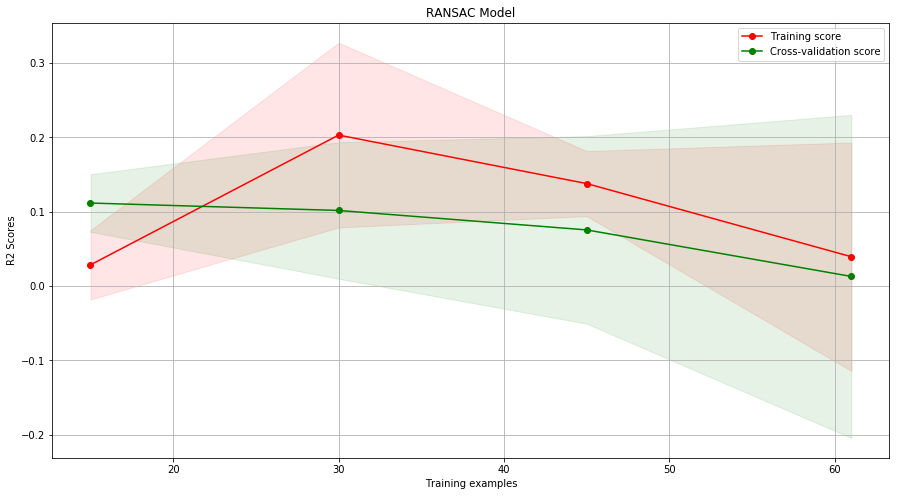

In [69]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_learning_curve(ax, 'RANSAC Model',
                    train_sizes, train_scores, validation_scores)

# Cross Validation

Cross validation was used when plotting the learning curves. Here's what K-fold Cross Validation does:
1. Partition training samples into K equal-sized groups
2. Pick a group for each training iteration:
 - train with the remaining K-1 groups
 - validate with this group

![cv](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)
(image: wikipedia)

Benefits:
- Better measure of generalization than sticking to the same training set
- Helps smaller datasets train better by varying training set

More explanation: http://scikit-learn.org/stable/modules/cross_validation.html

# Regularization

Regularization is applied when there is overfitting. 

- It's a heuristic.
- Adds a large constant value $\lambda$ * some aggregate of weights
- Penalizes the weights, so that they won't fit as well to training data as models get more complicated

L1 regularization:

![l1](assets/training-basics/least_squares_l1.png)

L2 regularization:

![l2](assets/training-basics/least_squares_l2.png)

(images: chioka.in)

To illustrate this, let's try adding regularization to the Polynomial Model.

Regularization parameter: 100
Coefficients [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept [-0.00209773]
Regularization parameter: 0.05
Coefficients [0.         0.01097006 0.01535503 0.0197425  0.02410331 0.02841156
 0.03264463 0.03678311 0.04081057 0.0447134  0.04848057 0.05210338
 0.05557527]
Intercept [-0.0027286]


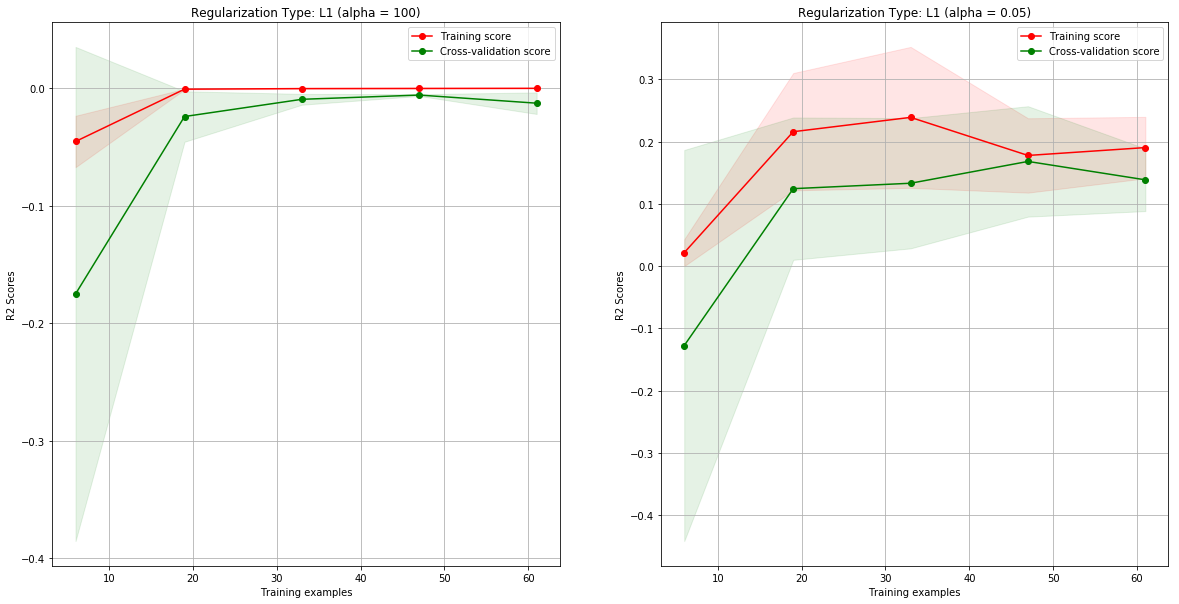

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

print('Regularization parameter: 100')

poly_model = SGDRegressor(penalty='l1',
                          alpha=100,
                          tol=1e-4,
                          max_iter=1000,
                          random_state=np.random.RandomState(123))

poly_model.fit(X_train_poly_scaled, y_train_scaled)

print('Coefficients', poly_model.coef_)
print('Intercept', poly_model.intercept_)

train_sizes, train_scores, validation_scores = learning_curve(
    poly_model, X_train_poly_scaled, y_train_scaled,
    random_state=np.random.RandomState(123))

plot_learning_curve(ax[0], 'Regularization Type: L1 (alpha = 100)',
                    train_sizes, train_scores, validation_scores)

print('Regularization parameter: 0.05')

poly_model = SGDRegressor(penalty='l1',
                          alpha=0.05,
                          tol=1e-4,
                          max_iter=1000,
                          random_state=np.random.RandomState(123))

poly_model.fit(X_train_poly_scaled, y_train_scaled)

print('Coefficients', poly_model.coef_)
print('Intercept', poly_model.intercept_)

train_sizes, train_scores, validation_scores = learning_curve(
    poly_model, X_train_poly_scaled, y_train_scaled,
    random_state=np.random.RandomState(123))

plot_learning_curve(ax[1], 'Regularization Type: L1 (alpha = 0.05)',
                    train_sizes, train_scores, validation_scores)

# Reading List

|Material|Read it for|URL|
|--|--|--|
|Optimization - Artificial Intelligence|Overview of Gradient Descent|https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/model_optimization.html|
|Chapter 5, Pages 107-119|Capacity, Overfitting and Underfitting|http://www.deeplearningbook.org/contents/ml.html|
|Machine Learning Explained: Regularization|Graphical comparison of different types of Regularization|http://enhancedatascience.com/2017/07/04/machine-learning-explained-regularization/|